<a href="https://colab.research.google.com/github/610Aditi/Training/blob/main/GENS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generative Adversarial Network**
A Generative Adversarial Network (GAN) is a type of deep learning model that is used for generating new synthic data that is similar to real data (image,video,text,music). It consists of two neural networks: a generator and a discriminator. The generator creates new data instances, while the discriminator evaluates whether the generated data is real or fake. These two networks are trained simultaneously in a competitive game, where the generator tries to produce data that can fool the discriminator, and the discriminator tries to distinguish between real and fake data. This adversarial process leads to the generation of increasingly realistic data by the generator.


WORK FLOW OF GENERATOR

The workflow of the generator in a GAN involves taking random noise as input and transforming it through a series of layers (typically using transposed convolutions) to produce synthetic data. The generator's goal is to produce data that is indistinguishable from real data, which it learns by trying to fool the discriminator. fake and real are passed to the discriminator.discriminator try to gusse which one is the real.Generator update to improve how real the fake looks. discriminator update to detect better fake. the compition continues until the fake image become realistic that the discriminator
cannot tell the difference

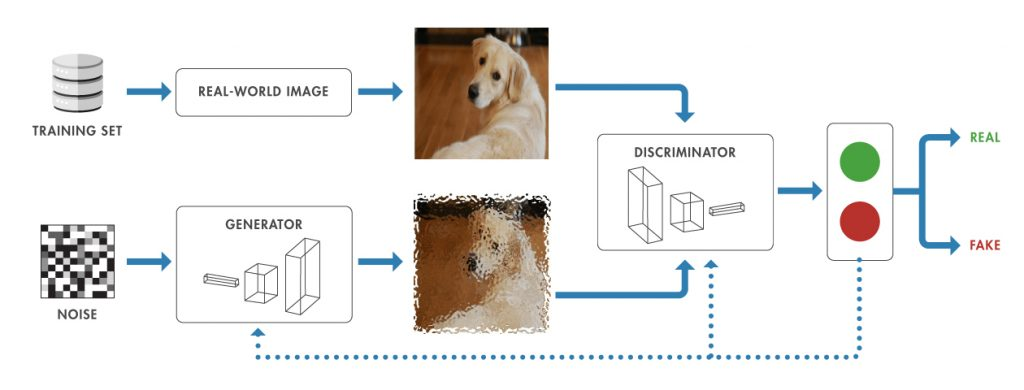

WORK FLOW OF GENERATORS

1)INPUT

2)PROCESSING

3)PASS A INPUT INTO SERIES LAYER(DENSE LAYER, CONTRANSPOSE , BATCHNORMS)

In [ ]:
# Generators
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape,BatchNormalization, LeakyReLU,Conv2DTranspose,Conv2D,Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# load dataset

(x_train,_),(_,_)= tf.keras.datasets.mnist.load_data()
x_train = (x_train - 127.5)/127.5
x_train = np.expand_dims(x_train, axis=1)

datasize = 60000
batch_size = 128
latent_dim = 100

def generators(num_dim =100):
  model = Sequential()
  model.add(Dense(7*7*128, input_dim = latent_dim)) # Adjusted dense layer output size
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())
  model.add(Reshape((7,7,128))) # Reshape to 7x7 with 128 channels

  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())

  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())

  model.add(Conv2DTranspose(1,kernel_size=4, strides=(1,1) ,activation='tanh', padding='same')) # Adjusted stride to get 28x28 output
  return model

In [ ]:
Generators = generators()
Generators.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_100 (LeakyReLU)     │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 6272)           │        25,088 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_20 (Reshape)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_60             │ (None, 14, 14, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_101 (LeakyReLU)     │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_61             │ (None, 28, 28, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_102 (LeakyReLU)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_62             │ (None, 28, 28, 1)      │         2,049 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,186,177 (4.52 MB)

 Trainable params: 1,173,121 (4.48 MB)

 Non-trainable params: 13,056 (51.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

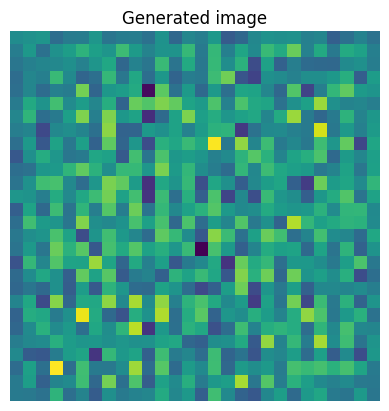

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
input = np.random.normal(0,1,(1,100))

output = Generators.predict(input)
output1 = (output+1)/2.0
plt.imshow(output1[0,:,:,0])
plt.title("Generated image")
plt.axis("off")

In [ ]:
# Discriminators

def discriminators():
  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(28,28,1)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  return model

Discriminators = discriminators()
Discriminators.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_103 (LeakyReLU)     │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_104 (LeakyReLU)     │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,769 (315.50 KB)

 Trainable params: 80,769 (315.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Loss and optimizers---
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator = generators()
discriminator = discriminators()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# Training step --
@tf.function
def training(images):
  input = np.random.normal(size=(batch_size,latent_dim)) # Changed to generate input with the correct shape
  with tf.GradientTape() as des_tape , tf.GradientTape() as gen_tape:
    generated_images = generator(input, training=True)
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    des_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
    des_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
    des_loss = des_loss_real + des_loss_fake
    gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)


  # compute the gradients
  des_gradients = des_tape.gradient(des_loss, discriminator.trainable_variables)
  gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)

  # apply optimizers --
  discriminator_optimizer.apply_gradients(zip(des_gradients, discriminator.trainable_variables))
  generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))

  return des_loss, gen_loss

In [ ]:
# Generate Image--

import numpy as np
import matplotlib.pyplot as plt
def generated_image(model,epoch):
  input = np.random.normal(size=(1,latent_dim)) # Corrected input shape
  output = model(input,training=False)
  image = (output[0,:,:,0]+1)/2.0 # Corrected slicing to get the image
  plt.imshow(image, cmap='gray') # Added cmap='gray' for grayscale images
  plt.title(f"Generated image, Epoch {epoch}") # Improved title
  plt.axis("off")
  plt.show()

In [ ]:
(x_train,_),(_,_)= tf.keras.datasets.mnist.load_data()
x_train = (x_train - 127.5)/127.5
x_train = np.expand_dims(x_train, axis=-1) # Changed axis to -1 to put channel last

datasize = 60000
batch_size = 128
latent_dim = 100

data = tf.data.Dataset.from_tensor_slices(x_train).shuffle(datasize).batch(batch_size)
print(data)

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None)>


In [ ]:
# tarining loop--
def train(data,epochs=50):
  for epoch in range(1,epochs+1):
    for i in data:
      d_loss,g_loss = training(i)
    print(f"{epochs} - D_loss {d_loss},G_loss {g_loss}")

    if epoch % 5 == 0 or epoch==1 :
      generated_image(generator,epoch)

50 - D_loss 0.12860684096813202,G_loss 12.465361595153809


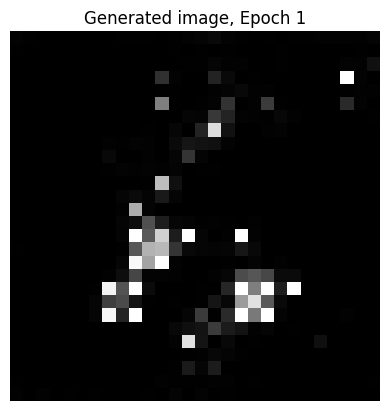

50 - D_loss 0.14584827423095703,G_loss 15.682655334472656
50 - D_loss 0.8479846119880676,G_loss 1.9211361408233643
50 - D_loss 1.3667864799499512,G_loss 0.833786129951477
50 - D_loss 1.356780767440796,G_loss 0.7510035037994385


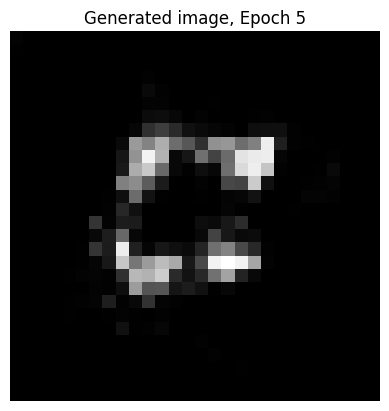

50 - D_loss 1.3622348308563232,G_loss 0.7402440905570984
50 - D_loss 1.3417974710464478,G_loss 0.7415634393692017
50 - D_loss 1.2105497121810913,G_loss 0.860954999923706
50 - D_loss 1.3016897439956665,G_loss 0.7998583316802979
50 - D_loss 1.3358495235443115,G_loss 0.7704206705093384


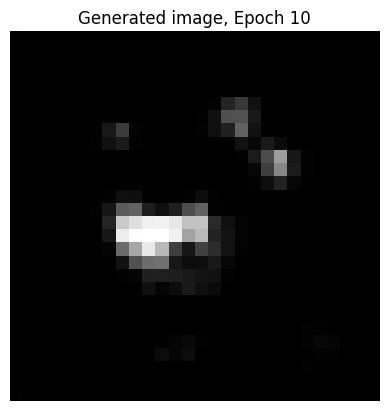

50 - D_loss 1.3479660749435425,G_loss 0.7375022172927856
50 - D_loss 1.365272879600525,G_loss 0.7247852087020874
50 - D_loss 1.3446755409240723,G_loss 0.7359939813613892
50 - D_loss 1.334998369216919,G_loss 0.7483124136924744
50 - D_loss 1.3887081146240234,G_loss 0.7359980344772339


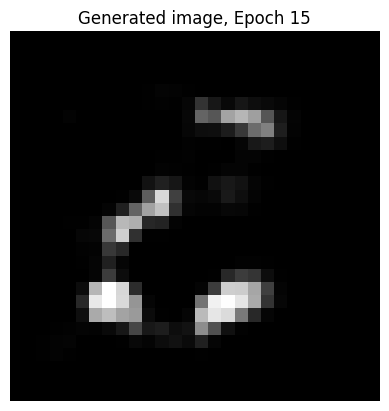

50 - D_loss 0.9789692163467407,G_loss 1.190281867980957
50 - D_loss 1.296231985092163,G_loss 0.830602765083313
50 - D_loss 1.3091988563537598,G_loss 0.7914173603057861
50 - D_loss 1.3721117973327637,G_loss 0.7186781764030457
50 - D_loss 1.3737215995788574,G_loss 0.7101233601570129


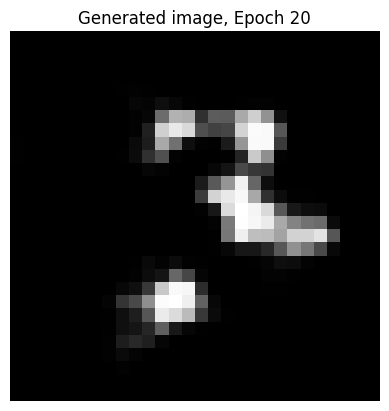

50 - D_loss 0.8736841678619385,G_loss 1.3485853672027588
50 - D_loss 1.2742266654968262,G_loss 0.8491150736808777
50 - D_loss 1.3284838199615479,G_loss 0.7645485997200012
50 - D_loss 1.3592010736465454,G_loss 0.7320024967193604
50 - D_loss 1.3600748777389526,G_loss 0.7221478223800659


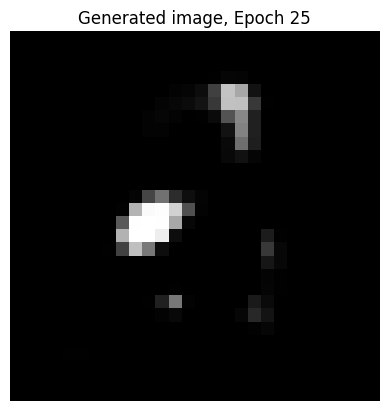

50 - D_loss 1.3214921951293945,G_loss 0.781567394733429
50 - D_loss 1.2636535167694092,G_loss 0.8542348146438599
50 - D_loss 1.3421106338500977,G_loss 0.748698353767395
50 - D_loss 1.3643155097961426,G_loss 0.7261151075363159
50 - D_loss 1.3137340545654297,G_loss 0.7631005644798279


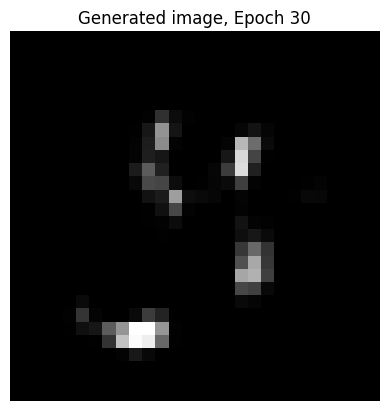

50 - D_loss 1.3229074478149414,G_loss 0.7594156265258789
50 - D_loss 1.3504362106323242,G_loss 0.7370127439498901
50 - D_loss 1.3624603748321533,G_loss 0.7256702780723572
50 - D_loss 1.3732142448425293,G_loss 0.7123841047286987
50 - D_loss 1.3717961311340332,G_loss 0.712472677230835


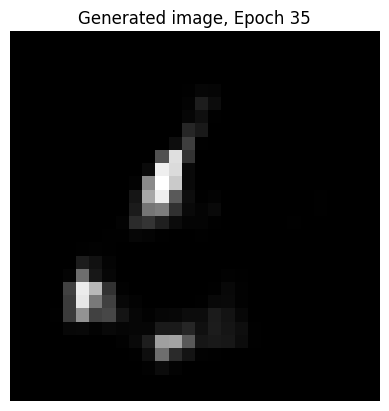

50 - D_loss 1.1925060749053955,G_loss 0.9374256134033203


In [ ]:
train(data,epochs=50)